# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


   Unnamed: 0  Class  Feature 0  Feature 1
0           0      0  -0.722247   0.531048
1           1      0  -2.383736   0.742365
2           2      1  -0.125943  -0.416003
3           3      0  -1.936617   0.688386
4           4      1   0.406225   0.373660


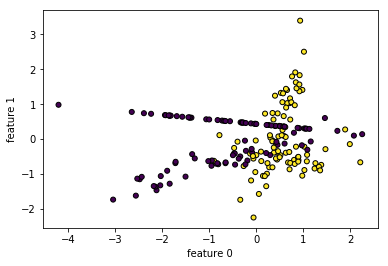

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions

student_identity = 'dkhublani'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('/home/drupad/5Files/' + filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
Y1=Y1.ravel()
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)
plt.scatter(X1[:, 0], X1[:, 1],c=Y1.ravel().tolist(), marker='o',s=25, edgecolor='k')

plt.show()


In [10]:
filenameToRead = '5challenge_testing_' + student_identity + '.csv'
test = pd.read_csv('/home/drupad/5Files/' + filenameToRead)

print(test.head())

X2 = pd.DataFrame(test[['Feature 0', 'Feature 1']].values)
Y2 = pd.DataFrame(test[['Class']].values)

   Class  Feature 0  Feature 1
0      0   0.215398   0.412126
1      1   0.314745   0.163146
2      0   0.695950   0.340889
3      1   1.082544   2.373450
4      1   0.291154  -0.141372


,0,1
0,0.215398,0.412126
1,0.314745,0.163146
2,0.695950,0.340889
3,1.082544,2.373450
4,0.291154,-0.141372
5,0.440153,0.696683
6,-0.228274,-0.613809
7,1.083677,-0.816343
8,-1.310939,-1.023429
9,0.872445,0.318214


In [3]:
from sklearn import svm
for i in ('rbf','linear', 'poly'):
    clf = svm.SVC(kernel=i)
    clf.fit(X1, Y1)
    print(clf.score(X1,Y1))

0.84
0.79
0.82


In [15]:
#GridSearchCV
Crange= np.linspace(0.1,20,100)
Gammarange=np.linspace(0.1,20,20)
bestparams=dict(C=Crange,gamma=Gammarange)
bestvalues=GridSearchCV(svm.SVC(),param_grid=bestparams,cv=None)
bestvalues.fit(X1,Y1)

print(bestvalues.best_params_,bestvalues.best_score_)

{'C': 3.517171717171717, 'gamma': 3.2421052631578946} 0.85


0.91


Text(0,0.5,'feature 1')

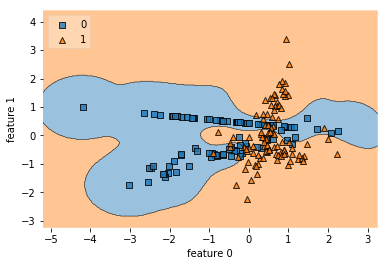

In [4]:
SVM_Kernel=svm.SVC(kernel='rbf',gamma=3.2421052631578946,C= 3.517171717171717)
SVM_Kernel.fit(X1,Y1)
SVM_Kernel.score(X1,Y1)
print(SVM_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVM_Kernel,legend=2)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)

In [11]:
test_pred=SVM_Kernel.predict(X2)
test['Class']=test_pred
test = test.drop(['Unnamed: 0'],axis=1)
test.head(10)

,Class,Feature 0,Feature 1
0,0,0.215398,0.412126
1,1,0.314745,0.163146
2,0,0.695950,0.340889
3,1,1.082544,2.373450
4,1,0.291154,-0.141372
5,1,0.440153,0.696683
6,0,-0.228274,-0.613809
7,1,1.083677,-0.816343
8,0,-1.310939,-1.023429
9,0,0.872445,0.318214


In [18]:
filenameToRead = '5challenge_testing_' + student_identity + '.csv'
test.to_csv('/home/drupad/5Files/' + filenameToRead,index=False)